## FIDE Chess Rankings
This tabular dataset contains 7 simple attributes with straight-forward meaning which has been described as following:

- __rank__      : Ranking of the player (as per their ELO rating)
- __name__      : Name of the player
- __ELO__       : Rating given by FIDE to players on basis of their performance (win and loss) in FIDE sponsored tournaments
- __title__     : Title they hold as per FIDE norms (GM = Grandmaster) (All of 200 players in the datasets are GMs)
- __federation__: Nation's federation which sponsors the player individually (mostly but not always is same as player's country of origin)
- __games__     : Number of international games player has played so far
- __birth_year__: Year in which corresponding player is born

In [30]:
import numpy as np                                                 
import pandas as pd                                                
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns 
import plotly.express as px
%matplotlib inline
sns.set()

from subprocess import check_output ###Assignment



In [31]:
chess_data = pd.read_csv("Chess FIDE Rankings.csv")

In [32]:
chess_data.head()

,rank,name,ELO,title,federation,games,birth_year
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990
1,2,Liren Ding,2806,GM,China,1630,1992
2,3,Alireza Firouzja,2793,GM,France,845,2003
3,4,Fabiano Caruana,2783,GM,United States,2622,1992
4,5,Levon Aronian,2775,GM,United States,3320,1982


In [33]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         200 non-null    int64 
 1   name         200 non-null    object
 2   ELO          200 non-null    int64 
 3   title        200 non-null    object
 4   federation   200 non-null    object
 5   games        200 non-null    int64 
 6   birth_year   200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


## Pre-Data Profiling

In [34]:
profile = pandas_profiling.ProfileReport(chess_data)


In [35]:
profile.to_file(output_file="chess_data_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Insights from pre profiling 
- __No column values are missing__
- __rank is highly correlated with ELO__
- __ELO is highly correlated with rank__
- __games is highly correlated with birth_year__
- __federation is highly correlated with title__

In [36]:
# Calculating age from Year
from datetime import date
today = date.today()
chess_data["Age"] = chess_data.apply(lambda x: today.year-x["birth_year"], axis=1)

In [37]:
chess_data.head()

,rank,name,ELO,title,federation,games,birth_year,Age
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990,32
1,2,Liren Ding,2806,GM,China,1630,1992,30
2,3,Alireza Firouzja,2793,GM,France,845,2003,19
3,4,Fabiano Caruana,2783,GM,United States,2622,1992,30
4,5,Levon Aronian,2775,GM,United States,3320,1982,40


In [38]:
# Creating a new column to divide the players among youngsters, experienced, veteran
chess_data["Experience"] = chess_data.apply(lambda x:"Youngsters" if x["Age"]<20 else ("Experienced" if x["Age"]<45 else "Veteran") , axis=1)

In [39]:
chess_data.drop("birth_year",inplace=True, axis=1)

In [40]:
chess_data.columns = ['rank', 'name', 'ELO', 'title', 'federation', 'games', 'Age',
       'Experience']

In [41]:
chess_data.drop("name",inplace=True, axis=1)

In [42]:
chess_data.drop("rank",inplace=True, axis=1)

In [43]:
chess_data.drop("title",inplace=True, axis=1)

In [44]:
chess_data

,ELO,federation,games,Age,Experience
0,2864,Norway,3125,32,Experienced
1,2806,China,1630,30,Experienced
2,2793,France,845,19,Youngsters
3,2783,United States,2622,30,Experienced
4,2775,United States,3320,40,Experienced
...,...,...,...,...,...
195,2608,Israel,697,52,Veteran
196,2608,India,535,23,Experienced
197,2608,Denmark,411,18,Youngsters
198,2608,India,1811,39,Experienced


In [45]:
profile = pandas_profiling.ProfileReport(chess_data)
profile.to_file(output_file="chess_data_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Count plot for Experience.')

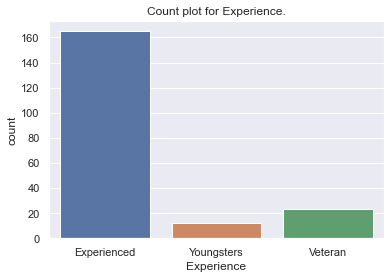

In [46]:
sns.countplot(x='Experience', data=chess_data).set_title('Count plot for Experience.')

In [47]:
d = pd.DataFrame(chess_data.groupby(['Experience'])['ELO'].mean())

In [48]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

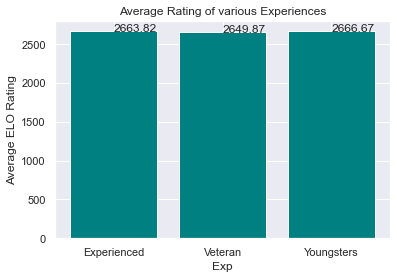

In [49]:
x,y = list(d.index),[round(i,2) for i in list(d['ELO'])]
plt.bar(x, y, color="teal")
    # calling the function to add value labels
addlabels(x, y)
      
    # giving title to the plot
plt.title("Average Rating of various Experiences")
      
    # giving X and Y labels
plt.xlabel("Exp")
plt.ylabel("Average ELO Rating")
      
    # visualizing the plot
plt.show()

__The average rating of the youngsters is hightest despite being the youngest__

In [50]:
set(chess_data['federation'])

{'Argentina ',
 'Armenia ',
 'Austria ',
 'Azerbaijan ',
 'Bulgaria ',
 'Canada ',
 'Chile ',
 'China ',
 'Croatia ',
 'Czech Republic ',
 'Denmark ',
 'Egypt ',
 'FIDE ',
 'France ',
 'Germany ',
 'Greece ',
 'Hungary ',
 'India ',
 'Iran ',
 'Israel ',
 'Italy ',
 'Kazakhstan ',
 'Netherlands ',
 'Norway ',
 'Paraguay ',
 'Peru ',
 'Poland ',
 'Romania ',
 'Russian Federation ',
 'Serbia ',
 'Slovenia ',
 'Spain ',
 'Sweden ',
 'Switzerland ',
 'Tajikistan ',
 'Turkey ',
 'Ukraine ',
 'United Arab Emirates ',
 'United Kingdom ',
 'United States ',
 'Uruguay ',
 'Uzbekistan ',
 'Viet Nam '}

In [51]:

from collections import OrderedDict

df = pd.DataFrame(chess_data.groupby(['federation'])['ELO'].count())
df.sort_values("ELO", inplace = True, ascending =  False)
df = df.head(10)
df


,ELO
federation,
Russian Federation,22
United States,19
India,17
Ukraine,13
FIDE,12
China,12
Armenia,9
Germany,9
Azerbaijan,7


In [52]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

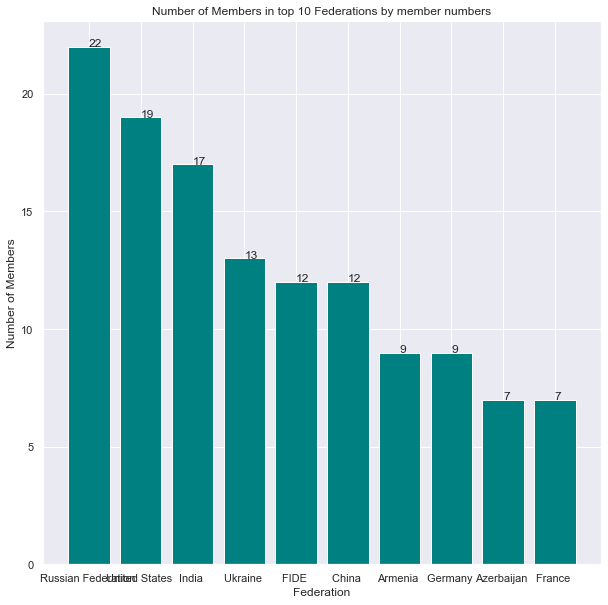

In [53]:
x,y = list(df.index),[round(i,2) for i in list(df['ELO'])]
plt.figure(figsize=(10,10)) 
plt.bar(x, y, color="teal")
    # calling the function to add value labels
addlabels(x, y)
      
    # giving title to the plot
plt.title("Number of Members in top 10 Federations by member numbers")
      
    # giving X and Y labels
plt.xlabel("Federation")
plt.ylabel("Number of Members")
      
    # visualizing the plot
plt.show()

In [54]:
plt.figure(figsize=(10,6))
px.treemap(chess_data, path=['federation'], title='')


<Figure size 720x432 with 0 Axes>

### Do players with the most matches have the highest rating?

In [55]:
chess_data.sort_values("games", inplace=True, ascending= False)
chess_data

,ELO,federation,games,Age,Experience
12,2756,India,3913,53,Veteran
149,2624,Netherlands,3749,50,Veteran
31,2704,Spain,3578,50,Veteran
78,2668,Israel,3394,54,Veteran
189,2610,Russian Federation,3360,53,Veteran
...,...,...,...,...,...
143,2629,Uzbekistan,389,17,Youngsters
83,2666,China,366,31,Experienced
160,2620,Uzbekistan,364,20,Experienced
156,2620,Chile,320,26,Experienced


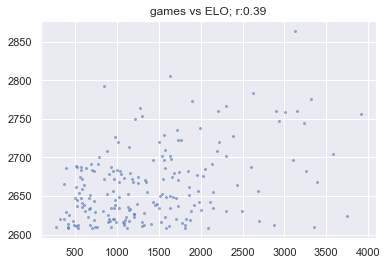

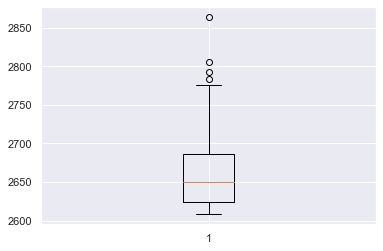

In [57]:
plt.boxplot(chess_data["ELO"], notch=None, patch_artist=None, widths=None)
plt.show()
